### Урок 3. Классификация. Логистическая регрессия.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 5, 3, 0, 5, 10, 1, 2],
              [500, 700, 750, 600, 1450, 800, 1500, 2000, 450, 1000],
              [1, 1, 2, 1, 2,  1, 3, 3, 1, 2]], dtype = np.float64)
y = np.array([0, 0, 1, 0, 1, 0, 1, 0, 1, 1], dtype = np.float64)

In [3]:
X

array([[1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00,
        1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00],
       [1.00e+00, 1.00e+00, 2.00e+00, 5.00e+00, 3.00e+00, 0.00e+00,
        5.00e+00, 1.00e+01, 1.00e+00, 2.00e+00],
       [5.00e+02, 7.00e+02, 7.50e+02, 6.00e+02, 1.45e+03, 8.00e+02,
        1.50e+03, 2.00e+03, 4.50e+02, 1.00e+03],
       [1.00e+00, 1.00e+00, 2.00e+00, 1.00e+00, 2.00e+00, 1.00e+00,
        3.00e+00, 3.00e+00, 1.00e+00, 2.00e+00]])

In [4]:
y

array([0., 0., 1., 0., 1., 0., 1., 0., 1., 1.])

In [5]:
def calc_std_feat(x):
    res = (x - x.mean()) / x.std()
    return res

In [6]:
X_st = X.copy()
X_st[2, :] = calc_std_feat(X[2, :])

In [7]:
X_st

array([[ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        ,  1.        ,  1.        ],
       [ 1.        ,  1.        ,  2.        ,  5.        ,  3.        ,
         0.        ,  5.        , 10.        ,  1.        ,  2.        ],
       [-0.97958969, -0.56713087, -0.46401617, -0.77336028,  0.97958969,
        -0.36090146,  1.08270439,  2.11385144, -1.08270439,  0.05155735],
       [ 1.        ,  1.        ,  2.        ,  1.        ,  2.        ,
         1.        ,  3.        ,  3.        ,  1.        ,  2.        ]])

In [8]:
def calc_logloss(y, y_pred):
    err = - np.mean(y * np.log(y_pred) + (1.0 - y) * np.log(1.0 - y_pred))
    err = np.sum(err)
    return err

In [9]:
# Пример применения
y1 = np.array([1, 0])
y_pred1 = np.array([0.9, 0.1])
calc_logloss(y1, y_pred1)

0.10536051565782628

In [10]:
def sigmoid(z):
    res = 1 / (1 + np.exp(-z))
    return res

In [11]:
z = np.linspace(-10, 10, 101)

In [12]:
probabilities = sigmoid(z)

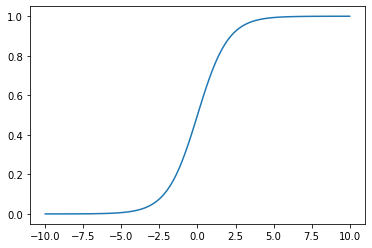

In [13]:
plt.plot(z, probabilities)
plt.show()

Logistic Regression

In [14]:
def eval_model(X, y, iterations, alpha=1e-4):
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations+1):
        z = np.dot(W, X)
        y_pred = sigmoid(z)
        err = calc_logloss(y, y_pred)
        W -= alpha * (1/n * np.dot((y_pred - y), X.T))
        if i % (iterations / 10) == 0:
            print(i, W, err)
    return W

In [15]:
W = eval_model(X_st, y, iterations=5000, alpha=1e-4)

500 [ 0.47822106 -0.20918419  0.64605995  1.49531432] 1.0559639161585663
1000 [ 0.46074241 -0.27647603  0.64395686  1.46891696] 0.945214871179169
1500 [ 0.44435675 -0.33951515  0.64152026  1.44406912] 0.8478360281905125
2000 [ 0.42913461 -0.39751872  0.63899625  1.42106251] 0.7651177745022372
2500 [ 0.41513888 -0.44956784  0.63671032  1.40023024] 0.6981293270105478
3000 [ 0.40240136 -0.49488241  0.63498247  1.38184975] 0.6468813805442176
3500 [ 0.39088925 -0.53321212  0.63401986  1.36601535] 0.6097021563515638
4000 [ 0.38049869 -0.56497213  0.63387116  1.35259671] 0.5836774145473647
4500 [ 0.37108342 -0.59102182  0.63446603  1.3413119 ] 0.5657147376221167
5000 [ 0.36249064 -0.61234585  0.63568321  1.33183158] 0.5532737788236778


## Д/з

### 1*. Измените функцию calc_logloss так, чтобы нули по возможности не попадали в np.log.

In [16]:
def calc_logloss2(y, y_pred):
    # Вычислим минимальное абсолютное значение в выборке (и минимальное абсолютное значение - 1).
    # Разделим полученное значение на большое число.
    # В результате получим незначимое для текущей выборки значение, которое можно добавить к выборке 
    # не повлияв значимо на её значения.
    # При этом 0 уже будет не 0 и его можно будет логарифмировать.
    shift1 = min(abs(y_pred[y_pred != 0]), default=1e-100) / 1e+100
    shift2 = min(abs(y_pred[y_pred - 1 != 0] - 1), default=1e-100) / 1e+100
   
    err = - np.mean(y * np.log(y_pred + shift1) + (1.0 - y) * np.log(1.0 - y_pred + shift2))
    err = np.sum(err)
    return err

### 2. Подберите аргументы функции eval_model для логистической регрессии таким образом, чтобы log loss был минимальным.

In [17]:
def eval_model2(X, y, iterations, alpha=1e-4):
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations+1):
        z = np.dot(W, X)
        y_pred = sigmoid(z)
        err = calc_logloss2(y, y_pred)
        W -= alpha * (1/n * np.dot((y_pred - y), X.T))
        #if i % (iterations / 10) == 0:
        #    print(i, W, err)
    return W, err

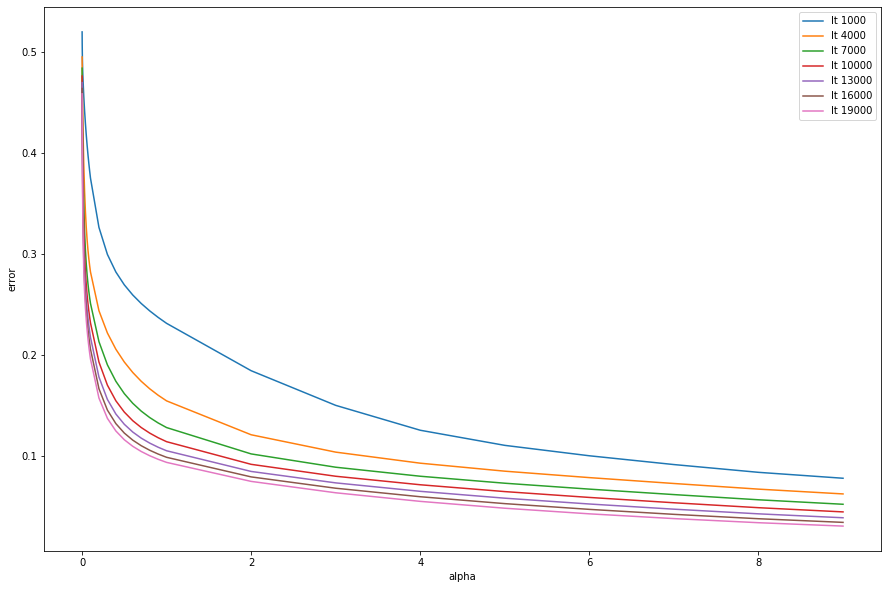

In [18]:
Al = np.concatenate([#np.arange(1e-5, 1e-4, 1e-5),
                     #np.arange(1e-4, 1e-3, 1e-4),
                     np.arange(1e-3, 1e-2, 1e-3),
                     np.arange(1e-2, 1e-1, 1e-2),
                     np.arange(1e-1, 1e-0, 1e-1),
                     np.arange(1e+0, 1e+1, 1e+0)
                    ])
It = np.arange(1000, 20000, 3000)
Err = []

for it in It:
    SubErr = []
    for al in Al:
        w, err = eval_model2(X_st, y, iterations=it, alpha=al)
        SubErr.append([al, err])
    Err.append([it, np.array(SubErr)])
    
ErrNp = np.array(Err)

plt.figure(figsize=(15,10))
for err in ErrNp:
    plt.plot(err[1][:, 0], err[1][:, 1], label=f'It {err[0]}')
plt.xlabel('alpha')
plt.ylabel('error')
plt.legend()
plt.show()

Чем больше итераций, тем ошибка меньше, что вполне логично. Странно то, что чем больше шаг alpha, тем ошибка меньше. Видимо модель переобучается.

In [35]:
# Ошибка очень маленькая
w, err = eval_model2(X_st, y, iterations=100000, alpha=1e+1)
print(w, err)

[-222.94265126  -15.72385124  -66.05407611  170.58782386] 0.006738783650461941


### 3. Создайте функцию calc_pred_proba, возвращающую предсказанную вероятность класса 1 (на вход подаются W, который уже посчитан функцией eval_model и X, на выходе - массив y_pred_proba).

In [36]:
def calc_pred_proba(W, X):
    return sigmoid(np.dot(W, X))

Получим предсказанные значения

In [37]:
calc_pred_proba(w, X_st)

array([3.31568569e-02, 5.04712364e-14, 1.00000000e+00, 2.01373965e-35,
       9.98265934e-01, 4.12799420e-13, 1.00000000e+00, 3.20215629e-04,
       9.68882102e-01, 1.00000000e+00])

### 4. Создайте функцию calc_pred, возвращающую предсказанный класс (на вход подаются W, который уже посчитан функцией eval_model и X, на выходе - массив y_pred).

In [38]:
def calc_pred(W, X):
    return (calc_pred_proba(W, X) > 0.5).astype(np.int)

Получим предсказанные значения для предыдущего примера

In [39]:
y_pred = calc_pred(w, X_st)
y_pred

array([0, 0, 1, 0, 1, 0, 1, 0, 1, 1])

### 5. Посчитайте Accuracy, матрицу ошибок, точность и полноту, а также F1 score.

In [41]:
# Accuracy
accuracy = sum(y_pred == y) / len(y)
accuracy

1.0

In [42]:
# Матрица ошибок
conf_matrix = np.zeros((2, 2))
for i, j in zip(y_pred, y.astype(np.int)):
    conf_matrix[i ^ 1][j ^ 1] += 1
    
conf_matrix

array([[5., 0.],
       [0., 5.]])

In [43]:
# Точность
precision = conf_matrix[0, 0]/(conf_matrix[0, 0] + conf_matrix[0, 1])
precision

1.0

In [44]:
# Полнота
recall = conf_matrix[0, 0]/(conf_matrix[0, 0] + conf_matrix[1, 0])
recall

1.0

In [45]:
# F1 score
F1 = 2 * precision * recall / (precision + recall)
F1

1.0

### 6. Могла ли модель переобучиться? Почему?

In [120]:
# Да, могла. Все метрики максимальные, ошибка очень маленькая, при этом коэффициенты W достаточно большие.